In [1]:
import os
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from pymc_marketing import clv
os.chdir("../")
from src.data import (
    getDataset,
    ProcessData
)
from src.config import RawFeatures
from src.models import BetaGeoModel
from src.utils import get_customer_history_data, get_customer_whatif_data

In [2]:
import arviz as az
from arviz.labels import MapLabeller

In [3]:
az.style.use("arviz-darkgrid")
%config InlineBackend.figure_format = "retina"

In [4]:
dt_format_ = '%d/%m/%Y %H:%M'
_dt_format = '%Y-%m-%d %H:%M'
df_transaction = getDataset()
df_transaction[RawFeatures.TRANSACTION_DATE] = df_transaction[RawFeatures.TRANSACTION_DATE].apply(
                                                    lambda x: dt.datetime.strptime(x, dt_format_).strftime(_dt_format) if x==x else x)

In [5]:
df_transaction.head()


,Customer ID,InvoiceDate,Price,Quantity
0,13085.0,2009-12-01 07:45,6.95,12.0
1,13085.0,2009-12-01 07:45,6.75,12.0
2,13085.0,2009-12-01 07:45,6.75,12.0
3,13085.0,2009-12-01 07:45,2.10,48.0
4,13085.0,2009-12-01 07:45,1.25,24.0


In [6]:
# pd.to_datetime(
#    df_transaction[RawFeatures.TRANSACTION_DATE].dropna().apply(lambda x: dt.datetime.strptime(x, '%d/%m/%Y %H:%M')),
# ).dt.date

In [7]:
data_inst = ProcessData(df_transaction, 'D', '2011-06-30')
data_summary = data_inst.model_data()
data_summary.head()

,frequency,recency,T,monetary_value
Customer ID,,,,
12346.0,7.0,400.0,725.0,11066.637143
12745.0,1.0,88.0,574.0,266.930000
12747.0,25.0,730.0,732.0,355.835600
12748.0,202.0,735.0,735.0,279.101436
12749.0,6.0,518.0,521.0,1010.743333


In [8]:
data_summary["T"].max()

738.0

In [9]:
data_summary["recency"].max()

738.0

In [10]:
data_summary.describe().iloc[[1, 2, 3, 5, 7], :]

,frequency,recency,T,monetary_value
mean,6.490052,386.782461,526.574346,422.646958
std,10.721823,227.335755,201.691737,2771.151697
min,1.000000,1.000000,9.000000,3.900000
50%,3.000000,389.000000,592.000000,300.305000
max,202.000000,738.000000,738.000000,168469.600000


# Modeling


In [11]:
bgm = BetaGeoModel(data_summary, 7)
bgm.fit()
bgm.fit_summary()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Initializing NUTS using jitter+adapt_diag...


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 29 seconds.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a,0.113,0.012,0.091,0.136,0.000,0.000,2337.0,2039.0,1.0
b,1.279,0.189,0.948,1.646,0.004,0.003,2317.0,2120.0,1.0
alpha,95.867,2.851,90.909,101.462,0.067,0.047,1843.0,2075.0,1.0
r,1.434,0.037,1.365,1.503,0.001,0.001,1827.0,2035.0,1.0


# Plots

In [12]:
# az.plot_posterior(bgm.fit_result);

In [13]:
# clv.plot_probability_alive_matrix(bgm);

In [14]:
customer_id = 12748.0
n_period = 20
T_future_transac = 7

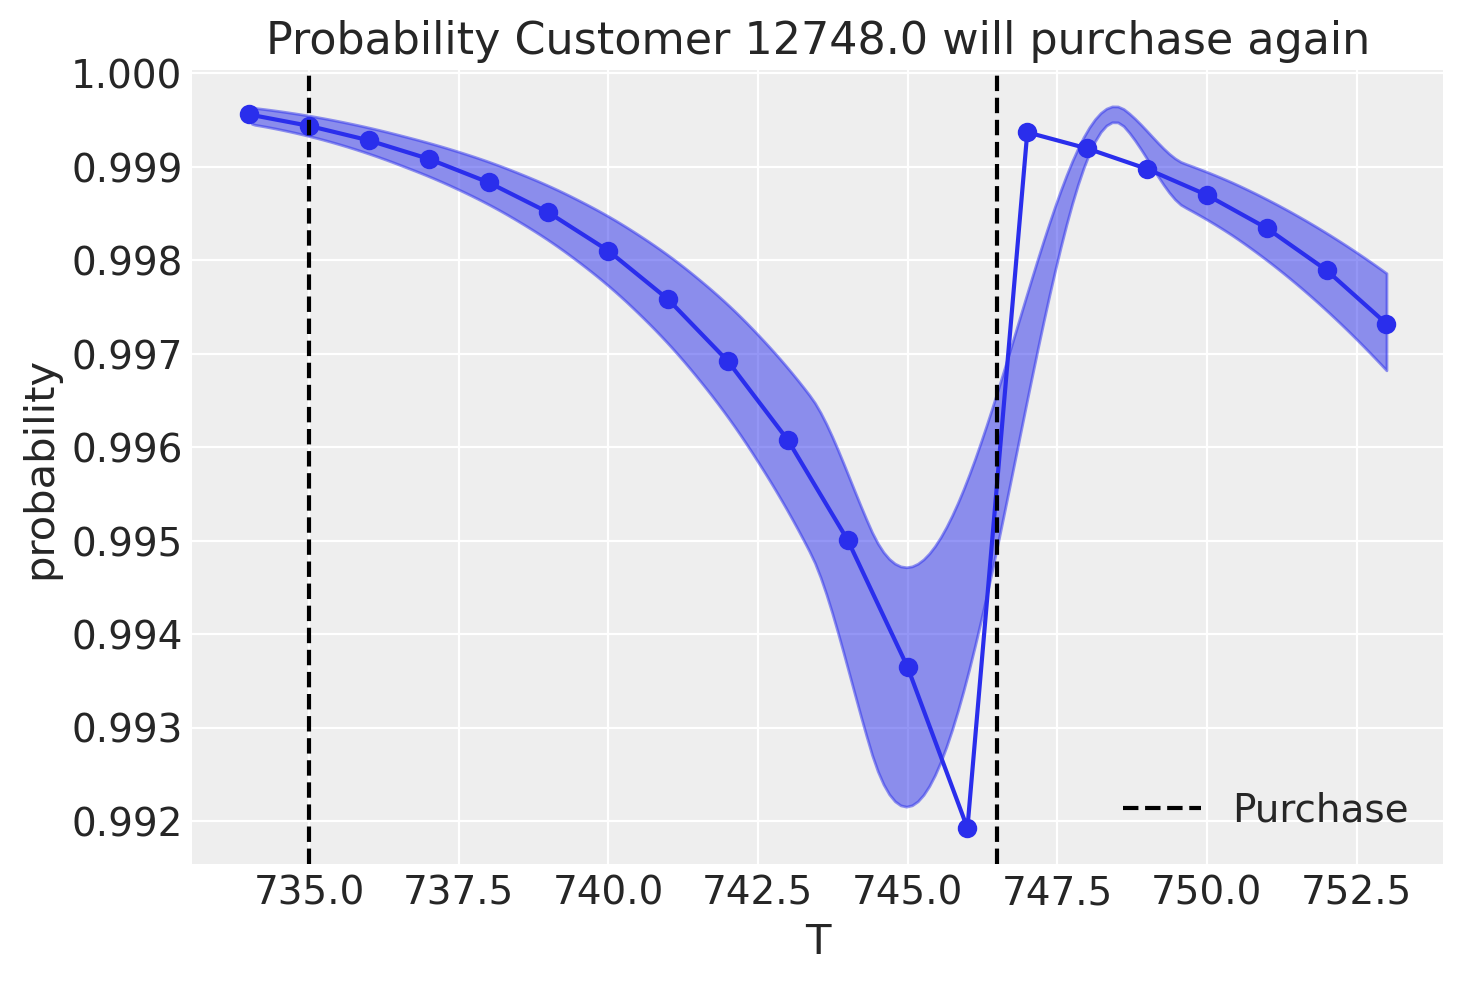

In [15]:
bgm.plot_probability_alive(
    customer_id,
    n_period,
    T_future_transac
)